<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/CNN/CNN_CIFAR_10_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape:", x_train.shape)
print("y-train shape", y_train.shape)

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y-train shape (50000,)


In [ ]:
# Cnn expects 3d input for convolution. Add a supurfluous 1d
x_train.shape

(50000, 32, 32, 3)

In [ ]:
K = len(set(y_train))
K

10

In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# We are increasing the number of feature maps for each layer
# The init and call methods are implemented in python for the (i) thing
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
# First argument is a list of inputs or a single input
# Second argument is a list of outputs or a single output
model = Model(i,x)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 566s 359ms/step - loss: 1.2840 - accuracy: 0.5566 - val_loss: 1.1731 - val_accuracy: 0.6018
Epoch 2/15
1563/1563 [==============================] - 541s 346ms/step - loss: 0.8333 - accuracy: 0.7102 - val_loss: 0.8269 - val_accuracy: 0.7188
Epoch 3/15
1563/1563 [==============================] - 528s 338ms/step - loss: 0.6805 - accuracy: 0.7655 - val_loss: 0.8241 - val_accuracy: 0.7186
Epoch 4/15
1563/1563 [==============================] - 522s 334ms/step - loss: 0.5802 - accuracy: 0.8008 - val_loss: 0.6986 - val_accuracy: 0.7717
Epoch 5/15
1563/1563 [==============================] - 508s 325ms/step - loss: 0.4917 - accuracy: 0.8309 - val_loss: 0.7017 - val_accuracy: 0.7762
Epoch 6/15
1563/1563 [==============================] - 516s 330ms/step - loss: 0.4176 - accuracy: 0.8559 - val_loss: 0.6531 - val_accuracy: 0.7941
Epoch 7/15
1563/1563 [==============================] - 507s 325ms/step - loss: 0.3583 - accuracy: 0.8764 - val_

In [ ]:
# Fit with data augmentation
# Note: If you run this after calling the previous model.fit(), it will Continue training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 578s 369ms/step - loss: 0.6079 - accuracy: 0.8029 - val_loss: 0.6452 - val_accuracy: 0.7937
Epoch 2/50
1562/1562 [==============================] - 532s 341ms/step - loss: 0.4997 - accuracy: 0.8315 - val_loss: 0.5309 - val_accuracy: 0.8247
Epoch 3/50
1562/1562 [==============================] - 543s 348ms/step - loss: 0.4622 - accuracy: 0.8432 - val_loss: 0.5623 - val_accuracy: 0.8177
Epoch 4/50
1562/1562 [==============================] - 546s 350ms/step - loss: 0.4361 - accuracy: 0.8524 - val_loss: 0.5289 - val_accuracy: 0.8253
Epoch 5/50
1562/1562 [==============================] - 537s 344ms/step - loss: 0.4129 - accuracy: 0.8600 - val_loss: 0.4631 - val_accuracy: 0.8423
Epoch 6/50
1562/1562 [==============================] - 559s 358ms/step - loss: 0.3976 - accuracy: 0.8635 - val_loss: 0.4570 - val_accuracy: 0.8496
Epoch 7/50
1562/1562 [==============================] - 555s 355ms/step - loss: 0.3746 - accuracy: 0.8709 - val_

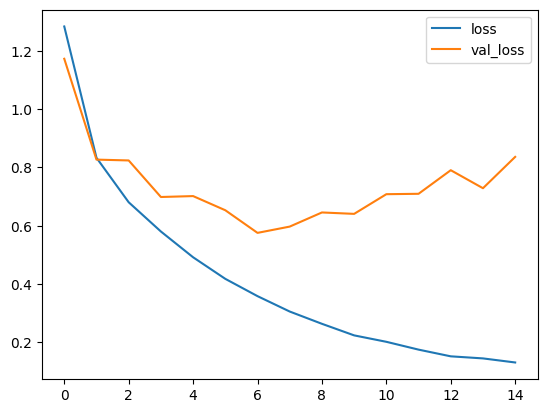

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


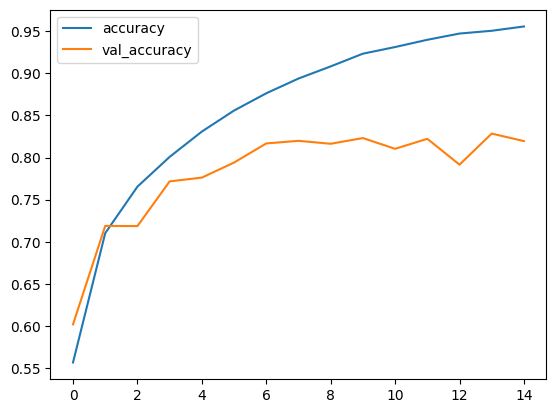

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
#If val l


313/313 [==============================] - 27s 86ms/step
confusion matrix without normalization
[[765   8  37  32  20   7  19  10  57  45]
 [  2 902   0  10   1   2   5   2  11  65]
 [ 30   0 666  56  74  64  86  12   5   7]
 [  6   3  19 676  41 145  76  23   4   7]
 [  3   2  21  60 801  41  40  25   6   1]
 [  3   0  19 116  24 798  19  16   2   3]
 [  3   1  11  23  11  13 925   2   7   4]
 [  5   2   6  32  37  62  11 836   4   5]
 [ 29  10   5   9   4   2  15   5 905  16]
 [  5  34   1   6   2   2  10   6  12 922]]


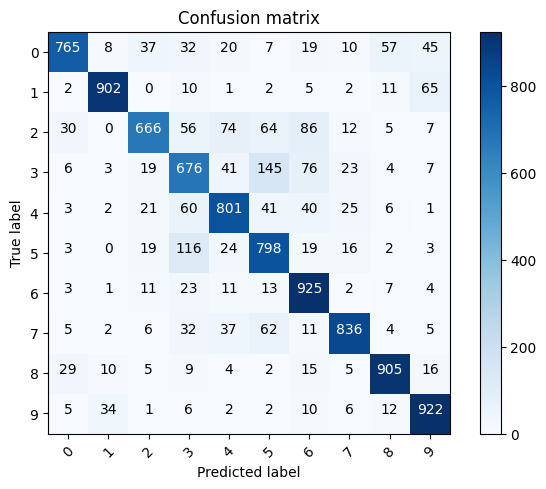

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting normalize=True
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: cat Predicted: bird')

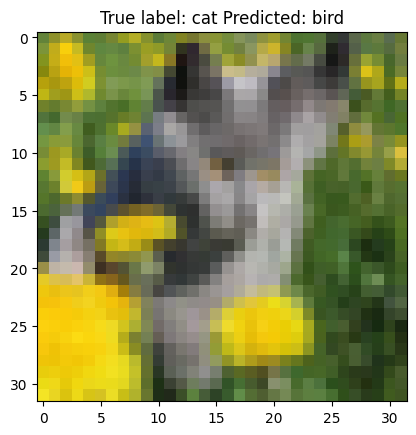

In [ ]:
# Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     